# Reproducible Data Visualization with Python (Matplotlib) in Jupyter Notebooks - Part II

Credits: This part of lecture is adapted from [Reproducible Science Curriculum - Data Exploration](https://github.com/Reproducible-Science-Curriculum/data-exploration-RR-Jupyter/blob/gh-pages/notebooks/Data_exploration.ipynb) and [Lectures on scientific computing with Python - matplotlib - 2D and 3D plotting in Python](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)

# 5. Exlorative Data Analysis

## Importing libraies
First, we need to import relavent Python libaraies needed to import, inspect, clean, and plot our data. To import a library, we use the syntax `import libraryName`. If we want to give the library a nickname to shorten the command, we can add `as nickNameHere`. An example of importing the Pandas library using the common nickname `pd` is below.

**`import`** `pandas` **`as`** `pd`

Normally, all commands to import libraries are organized at the top of each docuemnt. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

If there is error in importing `pandas` or `matplotlib`, most likely becuase you have not installed this package in your environment. In that case, run  `pip install pandas` `pip install matplotlib` in your commandline if you are running Jupyter Notebook locally; otherwise, run `pip install pandas matplotlib` in a code cell in your Notebook. 

## The Pandas Library

One of the best options for working with tabular data in Python is the Python Data Analysis Library (a.k.a. Pandas). The Pandas library is built on top of the NumPy package (another Python library). Pandas provides data structures, produces high quality plots with matplotlib, and integrates nicely with other libraries that use NumPy arrays. Those familiar with spreadsheets should become comfortable with Pandas data structures.

## matplotlib and other plotting libraries

`matplotlib` is the most widely used Python library for plotting. See [the IPython docs](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) for other IPython magics commands.Some of the many advantages of `matplotlib` library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled __programmatically (automation)__. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

In this lesson, we will use matplotlib and Seaborn, another package that works in tandem with matplotlib to make nice graphics.  There is a whole range of graphics packages in Python, ranging from basic visualizations to fancy, interactive graphics like [Bokeh](http://bokeh.pydata.org/en/latest/) and [Plotly](https://plot.ly/python/).  

We encourage you to explore on your own!  Chances are, if you can imagine a plot you'd like to make, somebody else has written a package to do it.


## The magic command
`%matplotlib inline` is the magic command, to run matplotlib inline, otherwise plots will be generated outside of the notebook and may be difficult to find.

## Using libraies
Each time we call a function that’s in a library, we use the syntax `LibraryName.FunctionName`. Adding the library name with a `.` before the function name tells Python where to find the function. In the example above, we have imported Pandas as `pd`. This means we don’t have to type out `pandas` each time we call a Pandas function.

See this free [Pandas cheat sheet](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet) from DataCamp for the most common Pandas commands. 

# Getting data into the notebook

We will begin by locating and reading our data which are in a table format as a tab-delimited file. We will use Pandas’ `read_table` function to pull the file directly into a `DataFrame`.

## What’s a `DataFrame`?
A `DataFrame` is a 2-dimensional data structure that can store in columns data of different types (including characters, integers, floating point values, factors and more). It is similar to a spreadsheet or a SQL table or data.frame in R. A `DataFrame` always has an index (0-based). An index refers to the position of an element in the data structure.

Note that we use `pd.read_table`, not just `read_table` or `pandas.read_table`, because we imported Pandas as `pd`.

In our original file, the columns in the data set are separated by a TAB. We need to tell the `read_table` function in Pandas that that is the delimiter with `sep = ‘\t’`.

In [2]:
gapminder = pd.read_table("../data/gapminderDataFiveYear_superDirty.txt", sep = "\t")

__<span style="color:red">Note for reproducibility</span>__: use relative path `../data/` instead of the absolute path `/Users/Huajin/reproducibility_workshop/data/`. 

In [3]:
# to view the first 5 lines of data
gapminder.head()

,year,pop,life Exp,gdpPercap,region
0,1952.0,8425333.0,28.801,779.445314,Asia_Afghanistan
1,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
2,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
3,1962.0,10267083.0,31.997,853.100710,Asia_Afghanistan
4,1962.0,NaN,31.997,NaN,Asia_Afghanistan


In [4]:
# to view the last 15 lines of data
gapminder.tail(15)

,year,pop,life Exp,gdpPercap,region
1705,1997.0,9417789.0,40.238,1071.353818,Africa_Zambia
1706,2002.0,10595811.0,39.193,1071.613938,Africa_Zambia
1707,2007.0,11746035.0,42.384,1271.211593,Africa_Zambia
1708,1952.0,3080907.0,48.451,406.884115,Africa_Zimbabwe
1709,1957.0,3646340.0,50.469,518.764268,Africa_Zimbabwe
1710,1962.0,4277736.0,52.358,527.272182,Africa_Zimbabwe
1711,1967.0,4995432.0,53.995,569.795071,Africa_Zimbabwe
1712,1972.0,5861135.0,55.635,799.362176,Africa_Zimbabwe
1713,1977.0,6642107.0,57.674,685.587682,Africa_Zimbabwe
1714,1982.0,7636524.0,60.363,788.855041,Africa_Zimbabwe


## Data cleaning and preprocessing
After data import, one should take some time to assess the structure and cleanliness of data, and perform data cleaning to enable further analysis and visulization. We will not cover those topics in this workshop, but you can see [Reproducible Science Curriculum - Data Exploration](https://github.com/Reproducible-Science-Curriculum/data-exploration-RR-Jupyter/blob/gh-pages/notebooks/Data_exploration.ipynb) module to learn some basics on your own.  For the purpose of this workshop, let's import the data that has already been cleaned, located under that `data` folder.

In [5]:
# read in the cleaned data and name it `gapminder_clean`


## Inspecting and Summerizing Data

Now let's inspect the data again by looking at the first several lines. 

We can also use the `shape` method to find out how many rows and columns there are in the data. 

In [7]:
# To view the shape of the data. Output will be (num rows, num columns)


(1716, 7)

In [8]:
# To view general informaiton (eg. data type and number of entries) of each column
gapminder_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 7 columns):
Unnamed: 0    1716 non-null int64
year          1716 non-null int64
pop           1716 non-null int64
lifeexp       1716 non-null float64
gdppercap     1716 non-null float64
country       1716 non-null object
continent     1716 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 93.9+ KB


In [9]:
# To calculate numeric summeries of each column
gapminder_clean.describe()

,Unnamed: 0,year,pop,lifeexp,gdppercap
count,1716.000000,1716.000000,1.716000e+03,1716.000000,1716.000000
mean,857.500000,1979.500000,2.939498e+07,59.577013,7170.489352
std,495.510848,17.265294,1.058144e+08,12.934328,9837.440250
min,0.000000,1952.000000,6.001100e+04,23.599000,241.165876
25%,428.750000,1965.750000,2.735858e+06,48.275750,1177.869539
50%,857.500000,1979.500000,6.985493e+06,60.873500,3484.113173
75%,1286.250000,1993.250000,1.929230e+07,70.961000,9279.348034
max,1715.000000,2007.000000,1.318683e+09,82.603000,113523.132900


But it doesn't make sense to calculate mean and std etc. for row index and year (the first two columns) . Let's pull out only the columns that contrain truly continuous numbers. 

In [10]:
gapminder_clean[['pop', 'lifeexp', 'gdppercap']].describe()

,pop,lifeexp,gdppercap
count,1.716000e+03,1716.000000,1716.000000
mean,2.939498e+07,59.577013,7170.489352
std,1.058144e+08,12.934328,9837.440250
min,6.001100e+04,23.599000,241.165876
25%,2.735858e+06,48.275750,1177.869539
50%,6.985493e+06,60.873500,3484.113173
75%,1.929230e+07,70.961000,9279.348034
max,1.318683e+09,82.603000,113523.132900


We can also extract one specific variable metric at a time if we wish:

In [11]:
print (gapminder_clean['lifeexp'].min())
print (gapminder_clean['lifeexp'].max())
print (gapminder_clean['lifeexp'].mean())
print (gapminder_clean['lifeexp'].std())
print (gapminder_clean['lifeexp'].count())

23.599
82.603
59.5770132168
12.9343277544
1716


## Plotting

Now that we have some basic understanding of the dataset we are working with, we can use data visualization to help get a better feel for the properties of the data. 

Recall that [matplotlib](http://matplotlib.org) is Python's main visualization 
library. It provides a range of tools for constructing plots and numerous 
high-level plotting libraries (e.g., [Seaborn](http://seaborn.pydata.org)) are 
built with matplotlib in mind. When we were in the early stages of setting up 
our analysis, we loaded these libraries:

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

While, we will
focus only on the essentials of how to properly construct plots in univariate
and bivariate settings here, it's worth noting that both matplotlib and Seaborn
support a diversity of plots: [matplotlib 
gallery](http://matplotlib.org/gallery.html), [Seaborn
gallery](http://seaborn.pydata.org/examples/). 

### Histograms and Boxplots

* __Histograms__ - provide a quick way of visualizing the frequencies of numerical
  data (one variable) 
* __Boxplots__ - provide a way of comparing the summary measures (e.g., max, min,
  quartiles) across variables in a data set. Boxplots can be particularly useful with larger data sets.


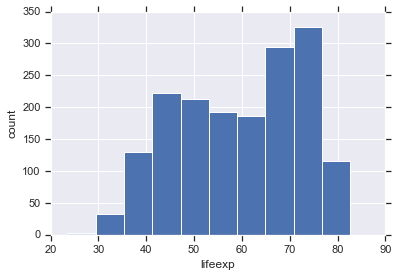

In [13]:
plt.hist(gapminder_clean['lifeexp'])
plt.xlabel('lifeexp')
plt.ylabel('count')

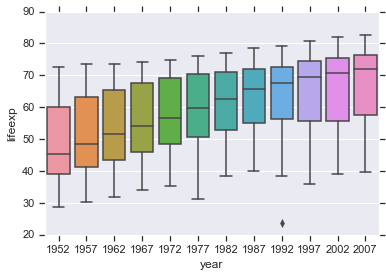

In [14]:
# complete the following code to make a box plot
sns.boxplot(x= , y= , data =  )

# creat labels for x and y axes 


### Pairs of numerical variables

* __Scatterplots__ - visualization of relationships across two variables...

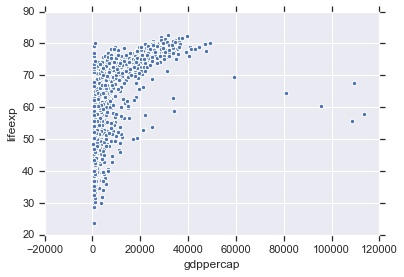

In [15]:
# makes a scatter plot between 'gdppercap' and 'lifeexp'
plt.scatter(  ,  )

# creat labels for x and y axes 

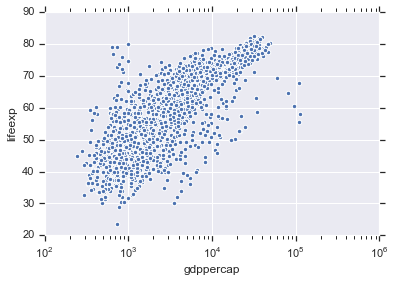

In [16]:
# make'gdppercap' on log scale 
plt.scatter(gapminder_clean['gdppercap'], gapminder_clean['lifeexp'])

# add a line here 


plt.xlabel('gdppercap')
plt.ylabel('lifeexp')

alabaster==0.7.10
anaconda-client==1.6.5
anaconda-navigator==1.6.9
anaconda-project==0.8.0
appnope==0.1.0
appscript==1.0.1
asn1crypto==0.22.0
astroid==1.5.3
astropy==2.0.2
Babel==2.5.0
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.0
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==2.0.0
bokeh==0.12.10
boto==2.48.0
Bottleneck==1.2.1
certifi==2017.7.27.1
cffi==1.10.0
chardet==3.0.4
click==6.7
cloudpickle==0.4.0
clyent==1.2.2
colorama==0.3.9
conda==4.3.30
conda-build==3.0.27
conda-verify==2.0.0
contextlib2==0.5.5
cryptography==2.0.3
cycler==0.10.0
Cython==0.26.1
cytoolz==0.8.2
dask==0.15.3
datashape==0.5.4
decorator==4.1.2
distributed==1.19.1
docutils==0.14
entrypoints==0.2.3
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==2.0.12
Flask==0.12.2
Flask-Cors==3.0.3
gevent==1.2.2
glob2==0.5
gmpy2==2.0.8
greenlet==0.4.12
h5py==2.7.0
heapdict==1.0.0
html5lib==0.999999999
idna==2.6
imageio==2.2.0
imagesize==0.7.1
ipykernel==4.6.1
ipython==6.1.0
ipython-genutils==0.2.0
ipywidgets==